TASK ONE: TEXT CLASSIFICATION

1. Download the BBC dataset provided on Moodle. The dataset, created by [Greene and Cunningham, 2006],
is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business,
entertainment, politics, sport, and tech.

2. Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf.
You may want to use matplotlib . pyplot and savefig to do this. This pre-analysis of the data set will
allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate
the performance of your classifier.


In [1]:
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
data = ds.load_files("BBC-20210914T194535Z-001\\BBC", encoding = "latin1")
distribution = Counter(data['target'])
for target_name in data['target_names']:
    distribution[target_name] = distribution.pop(data['target_names'].index(target_name))

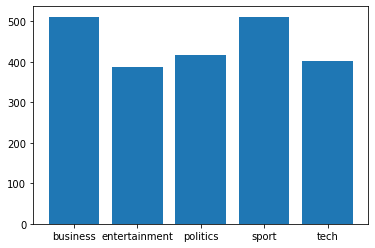

In [3]:
plt.bar(distribution.keys(), distribution.values())
plt.savefig("BBC-distribution.pdf")

3. Load the corpus using load_files and make sure you set the encoding to latin1. This will read the file
structure and assign the category name to each file from their parent directory name.
4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. This
means that the frequency of each word in each class must be computed and stored in a term-document
matrix. For this, you can use feature_extraction.text.CountVectorizer.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
X, y = data.data, data.target
vectorizer = CountVectorizer()
td_matrix = vectorizer.fit_transform(X)

5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
the parameter random state set to None.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.2, random_state=None)

6. Train a multinomial Naive Bayes Classifier (naive_bayes.MultinomialNB) on the training set using the
default parameters and evaluate it on the test set.

In [8]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

7. In a file called bbc-performance . txt , save the following information: (to make it easier for theTAs, make
sure that your output for each sub-question below is clearly marked in your output file, using the headings
(a), (b) ... )

&emsp;(a) a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. "MultinomialNB default values, try 1")

In [10]:
with open("bbc-performance.txt", "w+") as f:
    f.write("*******************************************************\n")
    f.write("********* MULTINOMIALNB DEFAULT VALUES, TRY 1 *********\n")
    f.write("*******************************************************\n\n")

&emsp;(b) the confusion matrix (you can use confusion_matrix)


In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
with open("bbc-performance.txt", "a") as f:
    f.write("b) confusion matrix\n")
    f.write(np.array2string(conf_matrix))

&emsp;(c) the precision, recall, and F1-measure for each class (you can use classification_report) 

In [13]:
from sklearn.metrics import classification_report

In [14]:
cla_report = classification_report(y_test, y_pred, target_names = data.target_names)
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nc) classification report\n")
    f.write(cla_report)

&emsp;(d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy_score and f1_score)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [16]:
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

&emsp;(e) the prior probability of each class  


In [17]:
total = sum(distribution.values())
with open("bbc-performance.txt", "a") as f:
    f.write("e) prior probabilities\n")
    for key, value in distribution.items():
        f.write(key + ": " + str(value/total) + "\n")

&emsp;(f) the size of the vocabulary (i.e. the number of different words)


In [18]:
size_of_vocabulary = td_matrix.shape[1]
with open("bbc-performance.txt", "a") as f:
    f.write("\nf) size of the vocabulary\n")
    f.write(str(size_of_vocabulary))

&emsp;(g) the number of word-tokens in each class (i.e. the number of words in total)

In [19]:
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + np.sum(doc)
    else:
        categories[category] = np.sum(doc)

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ng) number of word-tokens in each class\n")
    for key, value in categories.items():
        f.write(data.target_names[key] + ": " + str(value)+ "\n")

&emsp;(h) the number of word-tokens in the entire corpus


In [20]:
number_of_wordTokens = np.sum(td_matrix)
with open("bbc-performance.txt", "a") as f:
    f.write("\nh) number of word-tokens in the entire corpus\n")
    f.write(str(number_of_wordTokens))

&emsp;(i) the number and percentage of words with a frequency of zero in each class

In [21]:
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + doc
    else:
        categories[category] = doc

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ni) the number and percentage of words with a frequency of zero in each class\n")
    for key, value in categories.items():
        vocabulary_with_frequency0 = size_of_vocabulary - value.count_nonzero()
        f.write(data.target_names[key] + ": " + str(vocabulary_with_frequency0) + "(" + str(vocabulary_with_frequency0/size_of_vocabulary*100) + "%)\n")

&emsp;(j) the number and percentage of words with a frequency of one in the entire corpus

In [22]:
word_list = vectorizer.get_feature_names()
count_list = np.asarray(td_matrix.sum(axis=0))[0]
word_count_dict = dict(zip(word_list, count_list))
words_with_frequency1 = sum(value == 1 for value in word_count_dict.values())
with open("bbc-performance.txt", "a") as f:
    f.write("\nj) the number and percentage of words with a frequency of one in the entire corpus\n")
    f.write("number: " + str(words_with_frequency1) + "\n")
    f.write("percentage: " + str(words_with_frequency1/len(vectorizer.vocabulary_)*100) + "%\n")

&emsp;(k) your 2 favorite words (that are present in the vocabulary) and their log-prob

In [23]:
import math

In [24]:
word1 = "hope"
word2 = "peace"
log_prob_word1 = math.log(word_count_dict["hope"]/number_of_wordTokens)
log_prob_word2 = math.log(word_count_dict["peace"]/number_of_wordTokens)
with open("bbc-performance.txt", "a") as f:
    f.write("\nk) your 2 favorite words (that are present in the vocabulary) and their log-prob\n")
    f.write(word1 + ": " + str(log_prob_word1) + "\n")
    f.write(word2 + ": " + str(log_prob_word2) + "\n")

&emsp;8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change t he
model name to something like "MultinomialNB default values, try 2" and append the results to the file
bbc-performance.txt.

In [25]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
with open("bbc-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("********* MULTINOMIALNB DEFAULT VALUES, TRY 2 *********\n")
    f.write("*******************************************************\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
with open("bbc-performance.txt", "a") as f:
    f.write("b) confusion matrix\n")
    f.write(np.array2string(conf_matrix))
cla_report = classification_report(y_test, y_pred, target_names = data.target_names)
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nc) classification report\n")
    f.write(cla_report)
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")
total = sum(distribution.values())
with open("bbc-performance.txt", "a") as f:
    f.write("e) prior probabilities\n")
    for key, value in distribution.items():
        f.write(key + ": " + str(value/total) + "\n")
size_of_vocabulary = td_matrix.shape[1]
with open("bbc-performance.txt", "a") as f:
    f.write("\nf) size of the vocabulary\n")
    f.write(str(size_of_vocabulary))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + np.sum(doc)
    else:
        categories[category] = np.sum(doc)

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ng) number of word-tokens in each class\n")
    for key, value in categories.items():
        f.write(data.target_names[key] + ": " + str(value)+ "\n")
number_of_wordTokens = np.sum(td_matrix)
with open("bbc-performance.txt", "a") as f:
    f.write("\nh) number of word-tokens in the entire corpus\n")
    f.write(str(number_of_wordTokens))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + doc
    else:
        categories[category] = doc

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ni) the number and percentage of words with a frequency of zero in each class\n")
    for key, value in categories.items():
        vocabulary_with_frequency0 = size_of_vocabulary - value.count_nonzero()
        f.write(data.target_names[key] + ": " + str(vocabulary_with_frequency0) + "(" + str(vocabulary_with_frequency0/size_of_vocabulary*100) + "%)\n")
word_list = vectorizer.get_feature_names()
count_list = np.asarray(td_matrix.sum(axis=0))[0]
word_count_dict = dict(zip(word_list, count_list))
words_with_frequency1 = sum(value == 1 for value in word_count_dict.values())
with open("bbc-performance.txt", "a") as f:
    f.write("\nj) the number and percentage of words with a frequency of one in the entire corpus\n")
    f.write("number: " + str(words_with_frequency1) + "\n")
    f.write("percentage: " + str(words_with_frequency1/len(vectorizer.vocabulary_)*100) + "%\n")
word1 = "hope"
word2 = "peace"
log_prob_word1 = math.log(word_count_dict["hope"]/number_of_wordTokens)
log_prob_word2 = math.log(word_count_dict["peace"]/number_of_wordTokens)
with open("bbc-performance.txt", "a") as f:
    f.write("\nk) your 2 favorite words (that are present in the vocabulary) and their log-prob\n")
    f.write(word1 + ": " + str(log_prob_word1) + "\n")
    f.write(word2 + ": " + str(log_prob_word2) + "\n")

&emsp;9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0 . 0001. Append the results at the
end of bbc-performance . txt .

In [26]:
clf = MultinomialNB(alpha = 0.0001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
with open("bbc-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("********* MULTINOMIALNB WITH 0.0001 SMOOTHING *********\n")
    f.write("*******************************************************\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
with open("bbc-performance.txt", "a") as f:
    f.write("b) confusion matrix\n")
    f.write(np.array2string(conf_matrix))
cla_report = classification_report(y_test, y_pred, target_names = data.target_names)
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nc) classification report\n")
    f.write(cla_report)
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")
total = sum(distribution.values())
with open("bbc-performance.txt", "a") as f:
    f.write("e) prior probabilities\n")
    for key, value in distribution.items():
        f.write(key + ": " + str(value/total) + "\n")
size_of_vocabulary = td_matrix.shape[1]
with open("bbc-performance.txt", "a") as f:
    f.write("\nf) size of the vocabulary\n")
    f.write(str(size_of_vocabulary))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + np.sum(doc)
    else:
        categories[category] = np.sum(doc)

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ng) number of word-tokens in each class\n")
    for key, value in categories.items():
        f.write(data.target_names[key] + ": " + str(value)+ "\n")
number_of_wordTokens = np.sum(td_matrix)
with open("bbc-performance.txt", "a") as f:
    f.write("\nh) number of word-tokens in the entire corpus\n")
    f.write(str(number_of_wordTokens))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + doc
    else:
        categories[category] = doc

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ni) the number and percentage of words with a frequency of zero in each class\n")
    for key, value in categories.items():
        vocabulary_with_frequency0 = size_of_vocabulary - value.count_nonzero()
        f.write(data.target_names[key] + ": " + str(vocabulary_with_frequency0) + "(" + str(vocabulary_with_frequency0/size_of_vocabulary*100) + "%)\n")
word_list = vectorizer.get_feature_names()
count_list = np.asarray(td_matrix.sum(axis=0))[0]
word_count_dict = dict(zip(word_list, count_list))
words_with_frequency1 = sum(value == 1 for value in word_count_dict.values())
with open("bbc-performance.txt", "a") as f:
    f.write("\nj) the number and percentage of words with a frequency of one in the entire corpus\n")
    f.write("number: " + str(words_with_frequency1) + "\n")
    f.write("percentage: " + str(words_with_frequency1/len(vectorizer.vocabulary_)*100) + "%\n")
word1 = "hope"
word2 = "peace"
log_prob_word1 = math.log(word_count_dict["hope"]/number_of_wordTokens)
log_prob_word2 = math.log(word_count_dict["peace"]/number_of_wordTokens)
with open("bbc-performance.txt", "a") as f:
    f.write("\nk) your 2 favorite words (that are present in the vocabulary) and their log-prob\n")
    f.write(word1 + ": " + str(log_prob_word1) + "\n")
    f.write(word2 + ": " + str(log_prob_word2) + "\n")

&emsp;10. Redo steps 6 and 7, but this time, change the smoothing value to 0 . 9. Append the results at the end of
bbc-performance .txt.

In [27]:
clf = MultinomialNB(alpha = 0.9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
with open("bbc-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("********** MULTINOMIALNB WITH 0.9 SMOOTHING ***********\n")
    f.write("*******************************************************\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
with open("bbc-performance.txt", "a") as f:
    f.write("b) confusion matrix\n")
    f.write(np.array2string(conf_matrix))
cla_report = classification_report(y_test, y_pred, target_names = data.target_names)
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nc) classification report\n")
    f.write(cla_report)
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')
with open("bbc-performance.txt", "a") as f:
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")
total = sum(distribution.values())
with open("bbc-performance.txt", "a") as f:
    f.write("e) prior probabilities\n")
    for key, value in distribution.items():
        f.write(key + ": " + str(value/total) + "\n")
size_of_vocabulary = td_matrix.shape[1]
with open("bbc-performance.txt", "a") as f:
    f.write("\nf) size of the vocabulary\n")
    f.write(str(size_of_vocabulary))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + np.sum(doc)
    else:
        categories[category] = np.sum(doc)

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ng) number of word-tokens in each class\n")
    for key, value in categories.items():
        f.write(data.target_names[key] + ": " + str(value)+ "\n")
number_of_wordTokens = np.sum(td_matrix)
with open("bbc-performance.txt", "a") as f:
    f.write("\nh) number of word-tokens in the entire corpus\n")
    f.write(str(number_of_wordTokens))
categories = {}
for doc, category in zip(td_matrix, y):
    if(category in categories.keys()):
        categories[category] = categories[category] + doc
    else:
        categories[category] = doc

with open("bbc-performance.txt", "a") as f:
    f.write("\n\ni) the number and percentage of words with a frequency of zero in each class\n")
    for key, value in categories.items():
        vocabulary_with_frequency0 = size_of_vocabulary - value.count_nonzero()
        f.write(data.target_names[key] + ": " + str(vocabulary_with_frequency0) + "(" + str(vocabulary_with_frequency0/size_of_vocabulary*100) + "%)\n")
word_list = vectorizer.get_feature_names()
count_list = np.asarray(td_matrix.sum(axis=0))[0]
word_count_dict = dict(zip(word_list, count_list))
words_with_frequency1 = sum(value == 1 for value in word_count_dict.values())
with open("bbc-performance.txt", "a") as f:
    f.write("\nj) the number and percentage of words with a frequency of one in the entire corpus\n")
    f.write("number: " + str(words_with_frequency1) + "\n")
    f.write("percentage: " + str(words_with_frequency1/len(vectorizer.vocabulary_)*100) + "%\n")
word1 = "hope"
word2 = "peace"
log_prob_word1 = math.log(word_count_dict["hope"]/number_of_wordTokens)
log_prob_word2 = math.log(word_count_dict["peace"]/number_of_wordTokens)
with open("bbc-performance.txt", "a") as f:
    f.write("\nk) your 2 favorite words (that are present in the vocabulary) and their log-prob\n")
    f.write(word1 + ": " + str(log_prob_word1) + "\n")
    f.write(word2 + ": " + str(log_prob_word2) + "\n")

&emsp;11. In a separate plain text file called bbc-discussion . txt , explain in 1 to 2 paragraphs:
<br>(a) what metric is best suited to this dataset/task and why (see step (2))
<br>(b) why the performance of steps (8-10) are the same or are different than those of step (7) above.

In [28]:
with open("bbc-discussion.txt", "w+") as f:
    f.write("a) The macro accuracy is well suited for this dataset, because the distribution of categories is relatively\n"+
    "even, and none of the categories holds a significantly heavier weight than others in the classification.\n\n")
    f.write("b) The steps 7, 8 and 10 yielded the same result, while step 9 yielded a slightly different result. This can\n"+
    "be explained by the fact that steps 7 and 8 are both computing on the same training set using the same algorithm without\n"+
    "inherent randomness (naive bayes). Their results are therefore the same. As for step 10, we only slightly modified the\n"+
    "smoothing value from 1.0 to 0.9, the bulk of the computation stays structurally similar and thus the result didn't change.\n"+
    "As for step 9, we changed the smoothing value significantly from 1.0 (default) to 0.001, thus introducing some slight changes\n"+
    "in the final classification.")

TASK TWO: DRUG CLASSIFICATION

1. Download the Drug dataset on Moodle. This dataset, in csv format, contains features that are numerical,categorical and ordinal as well as one of 5 classes to predict: DrugA, DrugB, DrugC, DrugX, or DrugY.
2. Load the dataset in Python (you can use pandas. read_csv) .

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("drug200.csv")

3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib. pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.

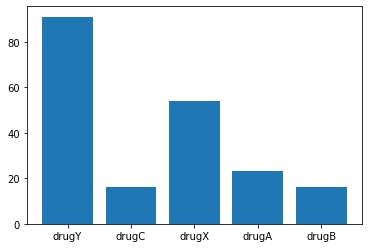

In [31]:
drug = df.iloc[:, -1]
distribution = Counter(drug) 
plt.bar(distribution.keys(), distribution.values())
plt.savefig("drug-distribution.pdf")

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas .get_dummies and pandas. Categorical to do this.

In [32]:
df['Sex'] = pd.get_dummies(df['Sex'])
df['BP'] = pd.Categorical(df['BP'], ordered = True, categories = ['LOW', 'NORMAL', 'HIGH'])
df['Cholesterol'] = pd.Categorical(df['Cholesterol'], ordered = True, categories = ['NORMAL', 'HIGH'])
df['Drug'] = pd.Categorical(df['Drug'], ordered = True, categories = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
df['BP'] = df['BP'].cat.codes
df['Cholesterol'] = df['Cholesterol'].cat.codes
df['Drug'] = df['Drug'].cat.codes
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4
...,...,...,...,...,...,...
195,56,1,0,1,11.567,2
196,16,0,0,1,12.006,2
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


5. Split the dataset using train_test_spli t using the default parameter values.

In [33]:
train, test = train_test_split(df)

6. Run 6 different classifiers:


&emsp;(a) NB: a Gaussian Naive Bayes Classifier (naive_bayes. GaussianNB) with the default parameters.


In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = train.loc[:, feature_cols]
y = train.Drug
clf_GaussianNB = GaussianNB()
clf_GaussianNB.fit(X, y)

GaussianNB()

&emsp;(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf_decisionTree = DecisionTreeClassifier()
clf_decisionTree.fit(X, y)
clf_decisionTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

&emsp;(c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function that you have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max_depth : 2 different values of your choice
- min_samples_split: 3 different values of your choice

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[5, 10], 'min_samples_split':[2, 5, 10]}
clf_topDT = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_topDT.fit(X, y)
clf_topDT.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

&emsp;(d) PER: a Perceptron (linear model. Perceptron), with default parameter values.

In [40]:
from sklearn.linear_model import Perceptron

In [41]:
clf_perceptron = Perceptron()
clf_perceptron.fit(X, y)

Perceptron()

&emsp;(e) Base-MLP: a Multi-Layered Perceptron (neuraLnetwork.MLPClassifier) with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters.

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
clf_baseMLP = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic', solver = 'sgd')
clf_baseMLP.fit(X, y)

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', solver='sgd')

&emsp;(f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following parameter values:
- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30 +50 nodes, 3 hidden layers
with 10 + 10 + 10
- solver: Adam and stochastic gradient descent

In [44]:
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':[(30, 50,), (10, 10, 10,)], 'solver':('adam', 'sgd')}
clf_topMLP = GridSearchCV(MLPClassifier(), parameters)
clf_topMLP.fit(X, y)
clf_topMLP.best_params_

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\li

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shuo_\anaconda3_20210528\li

{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

&emsp;7. For each of the 6 classifier above, append the following information in a file called drugs-performance. txt:
(to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked
in your output file, using the headings (a), (b) ... )<br>
<br>(a) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the
model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
display the best hyperparameters found by the gridsearch.
<br>(b) the confusion matrix
<br>(c) the precision, recall, and F1-measure for each class
<br>(d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [45]:
#GaussianNB
y_test = test.Drug
y_pred = clf_GaussianNB.predict(test.loc[:, feature_cols])
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "w+") as f:
    f.write("*******************************************************\n")
    f.write("************* GAUSSIANNB CLASSIFIER, 1 TRY ************\n")
    f.write("*******************************************************\n\n")
    f.write("a) Using default hyperparameters.\n")
    f.write("\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

In [46]:
#DecisionTree
y_test = test.Drug
y_pred = clf_decisionTree.predict(test.loc[:, feature_cols])
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("*********** DECISION TREE CLASSIFIER, 1 TRY ***********\n")
    f.write("*******************************************************\n\n")
    f.write("a) Using default hyperparameters.\n")
    f.write("\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

In [47]:
#Top-DT
y_test = test.Drug
y_pred = clf_topDT.predict(test.loc[:, feature_cols])
hyper_params = clf_topDT.best_params_
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("************** TOP-DT CLASSIFIER, 1 TRY ***************\n")
    f.write("*******************************************************\n\n")
    f.write("a) optimized hyperparameters: \n")
    f.write(str(hyper_params))
    f.write("\n\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

In [48]:
#DEFAULT PERCEPTRON
y_test = test.Drug
y_pred = clf_perceptron.predict(test.loc[:, feature_cols])
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("************ DEFAULT PER CLASSIFIER, 1 TRY ************\n")
    f.write("*******************************************************\n\n")
    f.write("a) Using default hyperparameters.\n\n")
    f.write("\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#BASE MLP
y_test = test.Drug
y_pred = clf_baseMLP.predict(test.loc[:, feature_cols])
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("************** BASE MLP CLASSIFIER, 1 TRY *************\n")
    f.write("*******************************************************\n\n")
    f.write("a) Using default hyperparameters.\n\n")
    f.write("\n\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#TOP MLP
y_test = test.Drug
y_pred = clf_baseMLP.predict(test.loc[:, feature_cols])
hyper_params = clf_topMLP.best_params_
conf_matrix = confusion_matrix(y_test, y_pred)
cla_report = classification_report(y_test, y_pred, target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
acc_score = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average = 'macro')
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted')

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("************** BASE MLP CLASSIFIER, 1 TRY *************\n")
    f.write("*******************************************************\n\n")
    f.write("a) optimized hyperparameters: \n")
    f.write(str(hyper_params))    
    f.write("\n\nb) confusion matrix\n")
    f.write(np.array2string(conf_matrix) + "\n")
    f.write("\nc) classification report\n")
    f.write(cla_report)
    f.write("\n\nd) accuracy and f1 scores\n")
    f.write("accuracy: " + str(acc_score) + "\n")
    f.write("macro f1 score: " + str(macro_f1) + "\n")
    f.write("weighted f1 score: " + str(weighted_f1) + "\n\n")

C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shuo_\anaconda3_20210528\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


&emsp;8. Redo steps 6, 10 times for each model and append the average accuracy, average macro-average F1, average
weighted-average F1 as well as the standard deviation for the accuracy, the standard deviation
of the macro-average F1, and the standard deviation of the weighted-average F1 at the end of the file
drugs-performance. txt. Does the same model give you the same performance every time? Explain in a
plain text file called drugs-discussion. txt. A 1 or 2 paragraph discussion is expected.

In [51]:
import statistics

In [52]:
#GaussianNB
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_GaussianNB.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("*********** GAUSSIANNB CLASSIFIER, 10 TRIES ***********\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")


#DecisionTree
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_decisionTree.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("*********** DECISION TREE CLASSIFIER, 10 TRIES ********\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")
    
#TOP-DT
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_topDT.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("*********** TOP-DT CLASSIFIER, 10 TRIES ***************\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")
    
#DEFAULT PERCEPTRON
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_perceptron.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("******* DEFAULT PERCEPTRON CLASSIFIER, 10 TRIES *******\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")
    
#BASE MLP
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_baseMLP.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("***************** BASE MLP CLASSIFIER, 10 TRIES *******\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")
    
    
#TOP MLP
accuracy_list = []
macro_average_list = []
weighted_average_list = []
y_test = test.Drug
y_pred = clf_topMLP.predict(test.loc[:, feature_cols])
for i in range(0,10):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    macro_average_list.append(f1_score(y_test, y_pred, average = 'macro'))
    weighted_average_list.append(f1_score(y_test, y_pred, average = 'weighted'))

with open("drugs-performance.txt", "a") as f:
    f.write("*******************************************************\n")
    f.write("***************** TOP MLP CLASSIFIER, 10 TRIES ********\n")
    f.write("*******************************************************\n\n")
    f.write("average accuracy: " + str(statistics.mean(accuracy_list)) + "\n")
    f.write("average macro-average F1: " + str(statistics.mean(macro_average_list)) + "\n")
    f.write("average weighted-average F1: " + str(statistics.mean(weighted_average_list)) + "\n")
    f.write("standard deviation for accuracy: " + str(np.std(accuracy_list)) + "\n")
    f.write("standard deviation for macro-average F1: " + str(np.std(macro_average_list)) + "\n")
    f.write("standard deviation for weighted-average F1: " + str(np.std(weighted_average_list)) + "\n")

In [53]:
with open("drugs-discussion.txt", "w+") as f:
    f.write("Since the standard deviation of all the models are 0 (or erroneously close to 0 due to limitation of digital\n"+
           "circuits and bits), the prediction of each model is fixed given a fixed training input. However, there are still\n"+
           "2 questions in my mind: 1. why is it that my TOP models obtained from cross-validation not seem to improve on the\n"+
           "prediction results; 2: the perceptrons are horrendously inaccurate. Is it because the data set is too small?")